<a href="https://colab.research.google.com/github/nell78/wallmart_dataset_analysis/blob/main/notebook/wallmart_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

# kaggle 폴더 생성 및 파일 이동

In [2]:
!ls -lha kaggle.json

!pip install -q kaggle # installing the kaggle package

!mkdir -p ~/.kaggle # creating .kaggle folder where the key should be placed

!cp kaggle.json ~/.kaggle/ # move the key to the folder

!pwd # checking the present working directory

-rw-r--r-- 1 root root 70 Sep 26 10:32 kaggle.json
/content


In [3]:
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# !kaggle datasets download -d <데이터셋-소유자>/<데이터셋-이름>
!kaggle datasets download -d devarajv88/walmart-sales-dataset

Dataset URL: https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset
License(s): other
  0% 0.00/4.80M [00:00<?, ?B/s]
100% 4.80M/4.80M [00:00<00:00, 97.6MB/s]


# 데이터 셋 압축풀기

In [5]:
import zipfile

with zipfile.ZipFile('walmart-sales-dataset.zip', 'r') as zip_ref:
  zip_ref.extractall('data')

In [8]:
import pandas as pd

# 데이터셋 로드
df = pd.read_csv('/content/data/walmart.csv')

# EDA
  - 구매금액과 사용자 성별 간의 관게
  - 구매금액과 결혼 상태 간의 관계
  

- 전체 데이터가 몇 개 있는 것인가?
- 몇 명의 User에 대한 정보가 있는 것인가? (`User_ID`의 개수)
- `Product_ID`의 수, `Gender`, `Occupation`, 'City_Category`... 각 컬럼의 값의 유일값, 분포
- 어떤 제품(`Product_ID`)가 제일 비쌀까? 그 제품은 어떤 카테고리인가?
- 가장 많이 팔린 제품은?
- Wallmart를 자주 찾는 사용자의 연령대는?
- Wallmart를 자주 찾는 사용자의 직업군은?

In [9]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB
None
(550068, 10)


In [13]:
df['User_ID'].nunique()

5891

In [14]:
df['Product_ID'].nunique()

3631

# 데이터의 분포 시각화하기

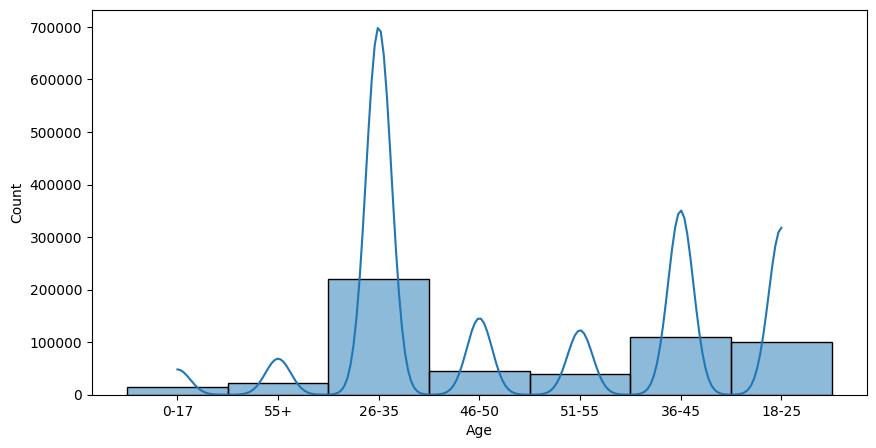

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True)
plt.show()

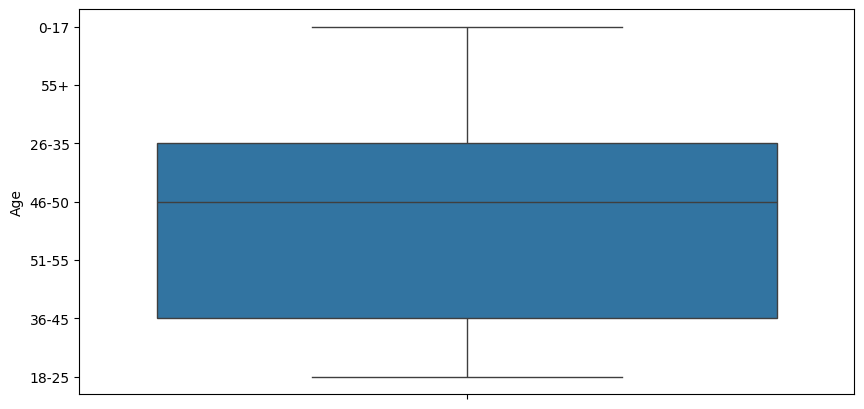

In [17]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['Age'])
plt.show()

In [18]:
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [19]:
df.sort_values(by='Purchase', ascending=False).head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
370891,1003160,P00052842,M,26-35,17,C,3,0,10,23961
93016,1002272,P00052842,M,26-35,0,C,1,0,10,23961
87440,1001474,P00052842,M,26-35,4,A,2,1,10,23961
503697,1005596,P00117642,M,36-45,12,B,1,0,10,23960
321782,1001577,P00052842,M,55+,0,C,1,1,10,23960


<Axes: xlabel='Purchase', ylabel='Count'>

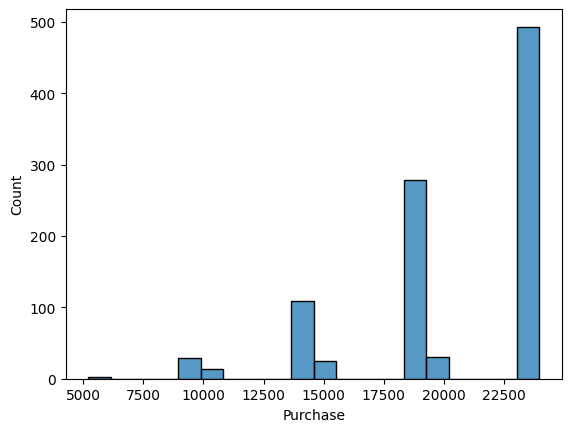

In [21]:
sns.histplot(df[df['Product_ID']=='P00052842']['Purchase'])

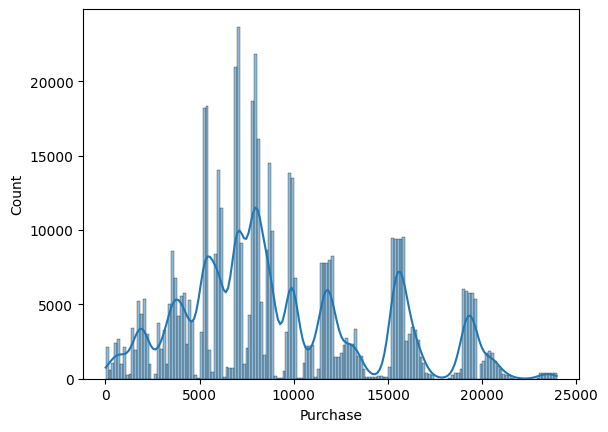

In [25]:
sns.histplot(df['Purchase'], kde=True)
plt.show()

In [23]:
# 가장 많이 팔린 제품은?
# df['Product_ID'].value_counts()[:10]
df.groupby('Product_ID').size().sort_values(ascending=False).head(10)

,0
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00145042,1406


In [24]:
# Wallmart를 자주 찾는 사용자의 직업군은?
df['Occupation'].value_counts()

,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588
